# Data:

File `cell-count.csv` contains cell count information for various immune cell populations of each patient sample. There are five populations: `b_cell`, `cd8_t_cell`, `cd4_t_cell`, `nk_cell`, and `monocyte`. Each row in the file corresponds to a biological sample.

# Task 1: Calculating the relative frequency of total cell count for each sample

Total cell count of each sample is the sum of cells in the five populations of that sample. Please return an output file in csv format with cell count and relative frequency of each population of each sample per line. The output file should have the following columns:

- **sample:** the sample id as in column sample in cell-count.csv
- **total_count:** total cell count of sample
- **population:** name of the immune cell population (e.g. b_cell, cd8_t_cell, etc.)
- **count:** cell count
- **percentage:** relative frequency in percentage

In [48]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing data
try:
    # Load the data
    data = pd.read_csv('../data/cell-count.csv')

    # Display the first few rows of the data frame
    print("Succesfully loaded data:")
    print(data.head())

    # Basic Operation: Calculate the total number of samples
    total_samples = data.shape[0]
    print(f"Total  number of samples: {total_samples}")

except Exception as e:
    print(f"An error occured: {e}")

Succesfully loaded data:
  project subject condition  age sex treatment response sample sample_type  \
0    prj1    sbj1  melanoma   70   F       tr1        y     s1        PBMC   
1    prj1    sbj1  melanoma   70   F       tr1        y     s2        PBMC   
2    prj1    sbj1  melanoma   70   F       tr1        y     s3        PBMC   
3    prj1    sbj2   healthy   65   F      none      NaN     s4        PBMC   
4    prj1    sbj3  melanoma   75   M       tr1        n     s5        PBMC   

   time_from_treatment_start  b_cell  cd8_t_cell  cd4_t_cell  nk_cell  \
0                        0.0   36000       24000       42000     6000   
1                        7.0   30000       22000       40000     2000   
2                       14.0   35000       26250       37500    10000   
3                        NaN   27900       17100       18000     4500   
4                        0.0   60000       30000       37500     4500   

   monocyte  
0     12000  
1      6000  
2     16250  
3     22500

In [3]:
populations = ["b_cell", "cd8_t_cell", "cd4_t_cell", "nk_cell", "monocyte"]

In [4]:
# Calculate total count of each sample
data['total_count'] = data[populations].sum(axis=1)

In [25]:
# Prepare the output DataFrame
output = pd.DataFrame()

# Loop through each population to calculate percentage
for population in populations:
    temp_df = pd.DataFrame()
    temp_df['sample'] = data['sample']
    temp_df['total_count'] = data['total_count']
    temp_df['population'] = population
    temp_df['count'] = data[population]
    temp_df['percentage'] = round((data[population] / data['total_count']) * 100, 2)
    output = pd.concat([output, temp_df])


In [26]:
# Updating the index values before saving as CSV
output = output.reset_index(drop=True)

In [27]:
# Save the processed data to a new CSV file
output.to_csv("../data/updated-cell-count.csv", index=False)

In [28]:
# Print head for preview
print(output.head())

  sample  total_count population  count  percentage
0     s1       120000     b_cell  36000        30.0
1     s2       100000     b_cell  30000        30.0
2     s3       125000     b_cell  35000        28.0
3     s4        90000     b_cell  27900        31.0
4     s5       150000     b_cell  60000        40.0


# Task 2 : Visual and statistical analysis

### Background
Melanoma, a form of skin cancer, can be treated with various therapeutic approaches, but the response to specific treatments like 'tr1' can vary significantly among patients. Understanding the immune system's role in this variability could provide critical insights into the effectiveness of treatments. In this context, analyzing the immune cell composition in peripheral blood mononuclear cells (PBMCs) offers a window into the body’s immune response mechanisms.

### Task Objectives
This task, we aim to investigate the differences in immune cell population frequencies between melanoma patients who respond to the treatment 'tr1' and those who do not. **By identifying which immune cells differ significantly between responders and non-responders, we can gain insights into potential biomarkers for predicting treatment outcomes.**

### Methodology
We will use a dataset containing cell count information for various immune cell populations from patient samples. Here are the specific steps we will undertake:

1. **Data Preparation**: Filter the dataset to focus only on patients treated with 'tr1' and those classified as having PBMC samples.
2. **Data Analysis**:
   - Calculate the relative frequencies of each immune cell population.
   - Compare these frequencies between responders (patients who responded positively to the treatment) and non-responders.
3. **Statistical Testing**:
   - Employ statistical tests (such as the Mann-Whitney U test) to identify significant differences in cell populations between the two groups.
4. **Visualization**:
   - Generate boxplots for each immune cell population to visually compare their distributions in responders versus non-responders.
5. **Reporting**:
   - Summarize the findings, discuss their implications, and suggest potential areas for further research.

### Expected Outcomes
We anticipate identifying specific immune cells whose relative frequencies significantly differ between responders and non-responders. These findings could help predict patient responses to treatment 'tr1' and contribute to more personalized and effective therapeutic strategies.

## Analysis

### Data Preparation

In [52]:
# We have already calculated the total count of cells in the prev task

# Filter for treatment 'tr1' and PBMC samples only
# Explicitly create a new DataFrame with necessary filters
filtered_data = data.loc[(data['treatment'] == 'tr1') & (data['sample_type'] == 'PBMC')].copy()

# Calculating the relative frequencies
for population in populations:
    filtered_data.loc[:, f'{population}_percent'] = (filtered_data[population] / filtered_data['total_count']) * 100
    # The use of .loc explicitly ensures that the operation is performed on the original DataFrame and not on 
    # a temporary or intermediate copy.

print(filtered_data.iloc[1])
filtered_data.head()

project                          prj1
subject                          sbj1
condition                    melanoma
age                                70
sex                                 F
treatment                         tr1
response                            y
sample                             s2
sample_type                      PBMC
time_from_treatment_start         7.0
b_cell                          30000
cd8_t_cell                      22000
cd4_t_cell                      40000
nk_cell                          2000
monocyte                         6000
total_count                    100000
b_cell_percent                   30.0
cd8_t_cell_percent               22.0
cd4_t_cell_percent               40.0
nk_cell_percent                   2.0
monocyte_percent                  6.0
Name: 1, dtype: object


,project,subject,condition,age,sex,treatment,response,sample,sample_type,time_from_treatment_start,...,cd8_t_cell,cd4_t_cell,nk_cell,monocyte,total_count,b_cell_percent,cd8_t_cell_percent,cd4_t_cell_percent,nk_cell_percent,monocyte_percent
0,prj1,sbj1,melanoma,70,F,tr1,y,s1,PBMC,0.0,...,24000,42000,6000,12000,120000,30.0,20.0,35.0,5.0,10.0
1,prj1,sbj1,melanoma,70,F,tr1,y,s2,PBMC,7.0,...,22000,40000,2000,6000,100000,30.0,22.0,40.0,2.0,6.0
2,prj1,sbj1,melanoma,70,F,tr1,y,s3,PBMC,14.0,...,26250,37500,10000,16250,125000,28.0,21.0,30.0,8.0,13.0
4,prj1,sbj3,melanoma,75,M,tr1,n,s5,PBMC,0.0,...,30000,37500,4500,18000,150000,40.0,20.0,25.0,3.0,12.0
5,prj1,sbj3,melanoma,75,M,tr1,n,s6,PBMC,7.0,...,24200,33000,5500,19800,110000,25.0,22.0,30.0,5.0,18.0


### Data Segmentation
Divide the filtered data into responders and non-responders:

In [45]:
responders = filtered_data[filtered_data['response'] == 'y']
non_responders = filtered_data[filtered_data['response'] == 'n']

### Generate Boxplots
We create boxplots for each immune cell population to visualize differences between responders and non-responders:

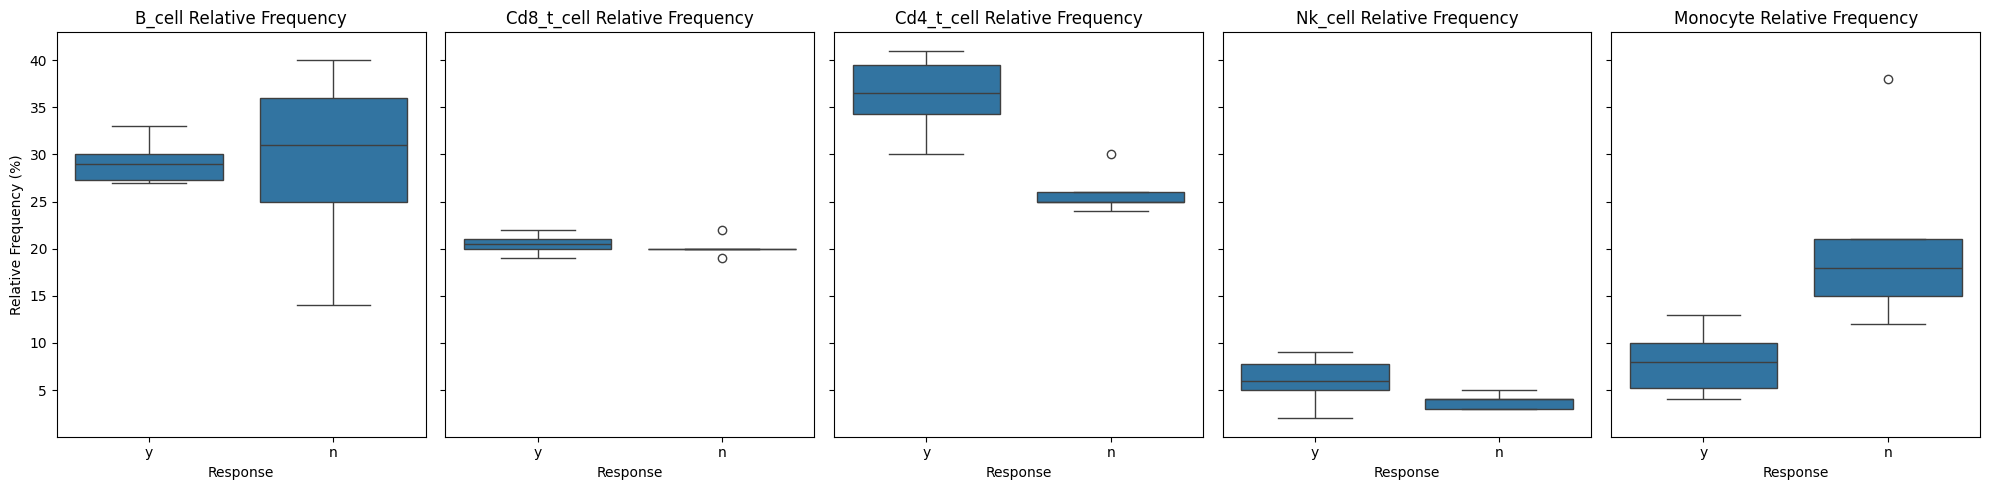

In [50]:
# Setting up the plot - one row, multiple columns
fig, axes = plt.subplots(nrows=1, ncols=len(populations), figsize=(20, 5), sharey=True)  # Sharey allows for sharing Y axis between plots

# Looping through populations and plotting each on a subplot
for i, population in enumerate(populations):
    sns.boxplot(x='response', y=f'{population}_percent', data=filtered_data, ax=axes[i])
    axes[i].set_title(f'{population.capitalize()} Relative Frequency')
    axes[i].set_xlabel('Response')
    if i == 0:  # Only add y-label to the first plot to avoid repetition
        axes[i].set_ylabel('Relative Frequency (%)')
    else:
        axes[i].set_ylabel('')

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()

> Analyzing the provided box plots of immune cell relative frequencies between responders (y) and non-responders (n) to treatment tr1, several observations and insights can be drawn about the distribution and potential significance of each cell population in relation to the treatment's effectiveness.


### Observations from the B-cell Relative Frequency Boxplot

The observed patterns in the B-cell relative frequencies between responders and non-responders, particularly noting the narrower interquartile range (IQR) for responders and the wider, more varied IQR for non-responders, provide some insights into the potential utility of B-cell relative frequency as an indicator of treatment response. Here’s a detailed exploration of what these observations could imply:

#### Narrower IQR in Responders

- **Consistency in Immune Profile:** The narrower IQR among responders suggests that there is a more consistent immune profile regarding B-cell relative frequencies in this group. This consistency might indicate a more uniform mechanism of action by the treatment in these patients, ***possibly due to similar underlying biological conditions** that are favorably affected by the treatment.*

- **Predictability of Response:** The predictability of treatment response could potentially be higher in individuals whose B-cell frequencies fall within this narrower range. This suggests that maintaining B-cell levels within certain bounds could be critical for achieving a positive response.

#### Wider IQR in Non-Responders

- **Heterogeneity in Immune Response:** The wider spread in B-cell frequencies among non-responders indicates a greater heterogeneity in immune responses. *This variability could be due to several factors, including **genetic diversity, different stages or types of disease, or varying environmental or health conditions** that affect how the immune system reacts to the treatment.*

- **Complexity in Treatment Efficacy:** The wide range of B-cell frequencies covering those of responders suggests that *simply having a specific level of B-cells does not guarantee a response to the treatment.* This complexity may imply that *other factors in addition to B-cell frequency play significant roles in influencing treatment outcomes.*

#### Implications for B-cell Frequency as an Indicator

- **Potential Biomarker with Limitations:** While B-cell relative frequency could serve as a potential biomarker for predicting treatment response, *the overlap in frequencies between responders and non-responders indicates that B-cell frequency alone may not be a definitive indicator*. Instead, it should be considered in combination with other biomarkers or clinical factors to improve predictive accuracy.
- **Need for Additional Biomarkers:** The variability in non-responders suggests that additional biomarkers need to be identified and combined with B-cell frequency to develop a more robust predictive model. These could include other immune cell types, genetic markers, or clinical parameters.

### Observations from the CD8 T-cell Relative Frequency Boxplot

Analyzing the boxplot provided for the CD8 T-cell relative frequency between responders ('y') and non-responders ('n') to the treatment tr1, some insights can be drawn about the potential role and behavior of CD8 T-cells in the immune response to this treatment. Here are some interpretations based on the boxplot:

#### Insights and Implications

- **CD8 T-cells as a Biomarker**: The similarity in medians suggests that *CD8 T-cell relative frequency might not be a strong standalone biomarker for predicting response to tr1 treatment in melanoma*, as there is no clear distinction in the central tendency between responders and non-responders.
- **Potential Role of CD8 T-cells**: CD8 T-cells, known for their role in cytotoxic immune responses, do not show a clear differential presence between the two groups, which might *suggest that the effectiveness of tr1 treatment is not predominantly mediated through mechanisms involving changes in CD8 T-cell proportions alone*.
- **Consideration of Outliers**: The presence of outliers in the non-responder group with higher CD8 T-cell frequencies could be of clinical interest. It *might be worth investigating whether these higher frequencies correlate with any particular clinical characteristics or outcomes, which could reveal subtypes within the non-responders that have unique immune profiles.*
  
#### Further Analysis

- Subgroup Analysis: Further analysis could be done on the non-responder subgroup with high CD8 T-cell frequencies to understand if their high CD8 levels are associated with resistance mechanisms to tr1 treatment.
- Combination with Other Markers: Since CD8 T-cells alone do not differentiate between responders and non-responders, combining this marker with other immune cell types or molecular markers could improve the predictive power of the immune profile.

The CD8 T-cell frequencies provide a piece of the puzzle, but clearly, additional factors are necessary to fully understand and predict treatment responses.

#### Recommendation for Further Research

To further elucidate the role of CD8 T-cells in the response to treatment tr1 and to better understand the implications of the observed variability and outliers in CD8 T-cell frequencies among non-responders, it is recommended to increase the sample size, particularly focusing on:

- Gathering More Diverse Samples: Enrich the dataset with a broader range of patients, including those with higher variability in CD8 T-cell frequencies. This approach would provide a more comprehensive understanding of the immune landscape across a wider spectrum of melanoma patients.

- Longitudinal Sampling: Collect immune cell frequency data at multiple time points during treatment. This longitudinal data collection can help track changes over time, offering insights into how CD8 T-cell levels might influence or be influenced by the treatment process.


#### Expected Outcomes

By increasing the diversity and number of samples, particularly among those with high variability in CD8 T-cell levels, researchers can:
- Achieve a deeper understanding of the mechanistic role that CD8 T-cells play in the immune response to melanoma treatments.
- Enhance the statistical power of the study, thereby improving the reliability and specificity of the findings.
- Potentially uncover unique immune profiles that could predict treatment success or failure, supporting the development of more personalized treatment plans.

### Observations from the CD4 T-cell Relative Frequency Boxplot

The boxplot for CD4 T-cell relative frequency between responders ('y') and non-responders ('n') provides a clear visual distinction between the two groups, indicating a potentially significant role of CD4 T-cells in response to treatment tr1. Here's an analysis based on the provided boxplot:

- **Median Relative Frequency**: The median relative frequency of CD4 T-cells is considerably higher in responders compared to non-responders. This suggests that a higher proportion of CD4 T-cells within the immune profile may be associated with a positive response to the treatment.
  
- **Interquartile Range (IQR)**: The IQR for responders is broader than that for non-responders, indicating greater variability among responders in terms of CD4 T-cell proportions. This could imply that while a higher CD4 T-cell level generally correlates with a better response, the exact level can still vary considerably among successful cases.

- **Overall Distribution**: The distribution for non-responders is very tight, with an extremely low median relative frequency of CD4 T-cells. This constrained variability suggests that low CD4 T-cell levels are consistently associated with non-response.

- **Outliers**: There is one outlier in the non-responder group, indicating a single non-responder with a CD4 T-cell relative frequency that aligns more closely with the responder group. This outlier might indicate an atypical case or could suggest potential subgroups within the non-responders that may respond differently to other treatments or interventions.

#### Insights and Implications

- **CD4 T-cells as Potential Biomarkers**: The clear distinction in CD4 T-cell frequencies between responders and non-responders strongly suggests that CD4 T-cell levels could serve as a reliable biomarker for predicting response to treatment tr1. Higher levels of CD4 T-cells might be indicative of an immune system that is more capable or prepared to respond positively to the treatment.

- **Role in Immune Response**: CD4 T-cells play a critical role in orchestrating the immune response, including helping activate other immune cells. Their higher frequencies in responders could indicate a more active or effective immune response mechanism being engaged in these patients.

- **Clinical Applications**: The findings could be used to adjust treatment strategies. For instance, patients with naturally lower CD4 T-cell frequencies might benefit from therapies that boost CD4 T-cell activity or numbers before administering tr1, potentially increasing their likelihood of response.

- **Further Research**: Investigating the biological or environmental factors that contribute to higher CD4 T-cell levels in responders could provide deeper insights into how to enhance treatment effectiveness. Additionally, studying the outlier in the non-responder group could yield insights into exceptions to typical patterns and guide personalized treatment adjustments.

The analysis of CD4 T-cell relative frequencies offers compelling evidence that these cells are crucial in mediating response to treatment tr1. Leveraging this information can help refine predictive models of treatment success and guide more personalized therapeutic approaches, potentially leading to better overall treatment outcomes.

The boxplot for NK (Natural Killer) cell relative frequencies between responders ('y') and non-responders ('n') provides valuable insights into the potential differences in NK cell activity or presence in relation to treatment response. Here is a detailed analysis of the plot:

### Observations from the NK Cell Relative Frequency Boxplot

- **Median Relative Frequency**: Responders show a higher median relative frequency of NK cells compared to non-responders. This indicates that responders tend to have a higher proportion of NK cells within their immune profile.
  
- **Interquartile Range (IQR)**: The IQR for responders is broader than for non-responders, which suggests greater variability in NK cell proportions among those who respond to the treatment. This variability could reflect differences in how individual immune systems of responders are modulated or respond to the treatment.
  
- **Overall Distribution**: The overall range for responders is also wider, indicating that some responders have significantly higher NK cell frequencies. In contrast, the range and IQR for non-responders are both narrow, showing less variability and generally lower frequencies of NK cells.

- **Data Spread and Extremes**: The absence of outliers in both groups suggests that the NK cell frequencies fall within a relatively expected range without extreme values that significantly deviate from the main body of data.

#### Insights and Implications

- **NK Cells and Treatment Response**: The higher median and wider variability of NK cell frequencies among responders might suggest that NK cells play a role in the effective immune response to the treatment. NK cells are known for their ability to recognize and kill cells that are stressed or infected without prior sensitization, which can be crucial in cancer treatment contexts.

- **Potential Biomarker for Efficacy**: The association of higher NK cell frequencies with treatment response suggests that NK cell levels could potentially serve as biomarkers for predicting treatment efficacy. Patients with higher levels of NK cells might be more likely to respond positively to the treatment.

- **Immunological Significance**: The differences in NK cell levels between responders and non-responders highlight the importance of innate immunity in the treatment response. This could influence future therapeutic strategies, such as combining traditional treatments with therapies that enhance NK cell activity.

- **Therapeutic Adjustments**: For patients with low NK cell levels (typical of non-responders), strategies to boost NK cell activity could be considered to improve treatment outcomes. This might involve the use of agents that specifically enhance NK cell proliferation or function.

#### Further Research

- **Longitudinal Studies**: Observational studies over the course of treatment could help clarify whether changes in NK cell levels correlate with changes in patient response over time, potentially leading to dynamic adjustments in therapeutic approaches based on NK cell metrics.

This analysis underscores the potential role of NK cells in mediating responses to treatment and supports the notion that enhancing specific arms of the immune system could be a viable strategy in cancer therapy. These findings could guide both clinical practice and research, focusing on leveraging innate immune responses in the fight against cancer.

### Observations from the Monocyte Relative Frequency Boxplot

The boxplot for monocyte relative frequency between responders ('y') and non-responders ('n') provides a clear visual differentiation in the monocyte distributions among these groups, which can yield significant insights into the immune dynamics under treatment tr1. Here's a detailed analysis of the monocyte relative frequencies based on the boxplot:

- **Median Relative Frequency**: Responders have a lower median relative frequency of monocytes compared to non-responders. This suggests that a lower proportion of monocytes within the immune profile may be associated with a positive response to the treatment.

- **Outliers**: There is an outlier in the non-responder group, indicating that at least one non-responder has a much higher frequency of monocytes,. This outlier could represent an atypical case or a potential sub-group among non-responders.

#### Insights and Implications

- **Potential Biomarker for Efficacy**: Given the differences in monocyte levels between responders and non-responders, monocyte frequency might serve as a potential biomarker for predicting treatment efficacy. Lower monocyte levels could potentially indicate a more favorable response to treatment.

- **Clinical Strategy**: Understanding the role of monocytes in the context of treatment response could help in tailoring treatment strategies. For example, if high monocyte levels are correlated with poor treatment response, interventions to modulate monocyte activity or number could be considered.

- **Further Research**: Investigating the biological or mechanistic reasons behind the variation in monocyte levels could provide insights into how to manipulate these levels to improve treatment outcomes. Additionally, the role of the outlier in the non-responder group should be examined to understand if there are unique characteristics or conditions that lead to their divergent monocyte frequency.

This analysis indicates that monocyte relative frequencies vary significantly between responders and non-responders and that these variations could be relevant for treatment outcomes. The role of monocytes in cancer treatment is complex, and further research into their specific functions and interactions could lead to better-targeted therapies and improved patient stratification in clinical trials.

## Statistical analysis

### Checking for normality

Since we have a small data set we go with the [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro–Wilk_test#Interpretation) from the `scipy.stats` module.

The null-hypothesis of this test is that the population is normally distributed. Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed. On the other hand, if the p value is greater than the chosen alpha level, then the null hypothesis (that the data came from a normally distributed population) can not be rejected 

Interpretation
- p-value < 0.05: Rejects the null hypothesis, suggesting the data is not normally distributed.
- p-value >= 0.05: Fails to reject the null hypothesis, suggesting the data is normally distributed.

In [55]:
from scipy.stats import shapiro

# Store results in a dictionary
normality_results = {}

for population in populations:
    stat_r, p_r = shapiro(responders[f'{population}_percent'])
    stat_nr, p_nr = shapiro(non_responders[f'{population}_percent'])
    normality_results[population] = {'Responders': (stat_r, p_r), 'Non-Responders': (stat_nr, p_nr)}

# Print results
for population, results in normality_results.items():
    print(f"{population.capitalize()} - Responders: Statistics={results['Responders'][0]:.3f}, p-value={results['Responders'][1]:.3f}")
    print(f"{population.capitalize()} - Non-Responders: Statistics={results['Non-Responders'][0]:.3f}, p-value={results['Non-Responders'][1]:.3f}")
    print()

B_cell - Responders: Statistics=0.886, p-value=0.299
B_cell - Non-Responders: Statistics=0.958, p-value=0.795

Cd8_t_cell - Responders: Statistics=0.960, p-value=0.820
Cd8_t_cell - Non-Responders: Statistics=0.828, p-value=0.135

Cd4_t_cell - Responders: Statistics=0.954, p-value=0.771
Cd4_t_cell - Non-Responders: Statistics=0.813, p-value=0.103

Nk_cell - Responders: Statistics=0.952, p-value=0.757
Nk_cell - Non-Responders: Statistics=0.881, p-value=0.314

Monocyte - Responders: Statistics=0.918, p-value=0.489
Monocyte - Non-Responders: Statistics=0.846, p-value=0.181



Here we see that the p-values for all the population across both the sets - responders and non-responders is > 0.05. Thus we can conclude that the data is normally distributed.

### Independent Samples t-Tests

Now that we've established that the data is normally distributed, we can proceed with parametric tests, which can provide more power and precision in analyzing the differences between responders and non-responders. The appropriate test in this case is the independent samples t-test, which compares the means of two independent groups under the assumption of normal distribution. We use the `scipy.stats` library for the same.

In [57]:
from scipy.stats import ttest_ind

# Dictionary to store t-test results
t_test_results = {}

for population in populations:
    stat, p = ttest_ind(responders[f'{population}_percent'], non_responders[f'{population}_percent'], equal_var=True)
    t_test_results[population] = (stat, p)

# Print the results
for population, results in t_test_results.items():
    print(f"{population.capitalize()} - Statistics={results[0]:.3f}, p-value={results[1]:.3f}")
    print()


B_cell - Statistics=-0.008, p-value=0.994

Cd8_t_cell - Statistics=0.463, p-value=0.654

Cd4_t_cell - Statistics=4.941, p-value=0.001

Nk_cell - Statistics=1.848, p-value=0.098

Monocyte - Statistics=-2.904, p-value=0.017



Interpret the Results
- p-value < 0.05: Suggests a statistically significant difference between the mean relative frequencies of immune cells in responders and non-responders.
- p-value >= 0.05: Suggests that there is no statistically significant difference in the means between the two groups.

Based on the interpretation we notice that `Cd4_t_cell` and `Monocyte` have a p-value < 0.05 and this indicates that there is a statistically significant difference between the mean relative frequencies of immune cells across the responders and non responders. **This correlates with the findings from the box plot as well.**

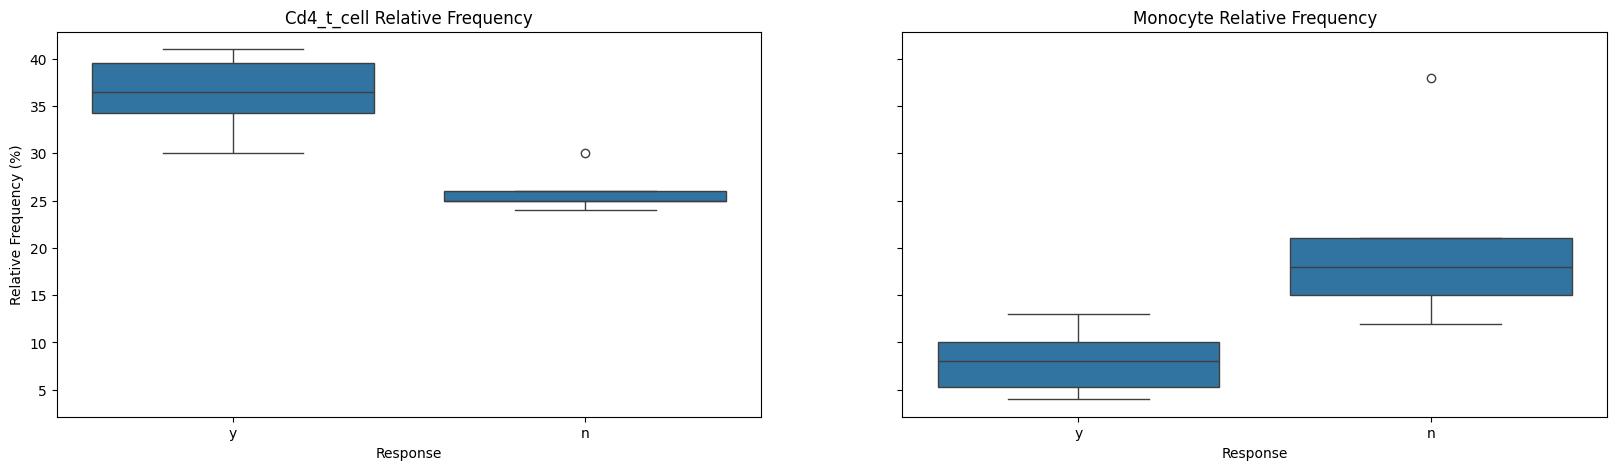

In [66]:
# Setting up the plot - one row, multiple columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), sharey=True)  # Sharey allows for sharing Y axis between plots

# Looping through populations and plotting each on a subplot
for i, population in enumerate(["cd4_t_cell", "monocyte"]):
    sns.boxplot(x='response', y=f'{population}_percent', data=filtered_data, ax=axes[i])
    axes[i].set_title(f'{population.capitalize()} Relative Frequency')
    axes[i].set_xlabel('Response')
    if i == 0:  # Only add y-label to the first plot to avoid repetition
        axes[i].set_ylabel('Relative Frequency (%)')
    else:
        axes[i].set_ylabel('')

plt.show()

## Task 2 Conclusion: Statistical Analysis of Immune Cell Frequencies in Response to Treatment tr1

The comprehensive analysis of immune cell relative frequencies in melanoma patients undergoing treatment tr1 has provided valuable insights into the immunological dynamics associated with treatment responses. The statistical tests conducted, particularly the independent samples t-tests on the normally distributed data, have validated observations from initial box plot visualizations, allowing for a robust conclusion regarding the immune profiles of responders and non-responders.

#### Key Findings:
- **CD4 T-cells**: There is a statistically significant difference in the relative frequencies of CD4 T-cells between responders and non-responders, with responders exhibiting higher levels. This finding supports the hypothesis that CD4 T-cells play a crucial role in mediating a positive response to treatment tr1, likely through their functions in orchestrating other immune responses and enhancing immune system communication.
- **Monocytes**: Similarly, monocytes showed significant differences in relative frequencies, with lower levels generally observed in responders compared to non-responders. This suggests that lower monocyte levels might be favorable in the context of this specific treatment, potentially related to reduced inflammatory responses or a more efficient immunological reaction against tumor cells.

#### Implications:
These findings underscore the potential of leveraging specific immune cell frequencies as biomarkers for predicting treatment outcomes. The significant roles of CD4 T-cells and monocytes, in particular, suggest pathways through which the treatment may be exerting its effects, and which could be targeted for therapeutic advantage.

#### Recommendations:
1. **Clinical Application**: Incorporating the measurement of CD4 T-cell and monocyte levels into routine diagnostic assessments may help predict patient responses to treatment tr1, enabling more personalized therapy plans.
2. **Further Research**: Additional studies should focus on exploring the mechanisms by which these cells influence treatment efficacy. This could involve molecular studies to understand the signaling pathways activated by these cells, as well as clinical trials to test interventions that modulate their levels or activity.
3. **Development of Predictive Models**: Integrating the relative frequencies of these immune cells into machine learning models could further refine the ability to predict treatment outcomes, providing clinicians with powerful tools for treatment customization.

### Final Thoughts:
This analysis not only highlights the importance of immune profiling in the management of melanoma but also demonstrates the potential for immune cells as predictive markers in cancer therapy. By continuing to explore and understand these relationships, we can hope to enhance the efficacy of treatment regimens and ultimately improve patient prognoses. This study exemplifies the critical intersection of immunology and personalized medicine, offering pathways toward more effective and tailored therapeutic approaches.